In [2]:
from BOVW import BOVW
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay
import pickle, dill

In [3]:
path = "../../../dataset/train/"
path_test = "../../../dataset/test/"
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

In [4]:
bovw = BOVW(num_cluster=100, step_size=25)

In [5]:
train_hist, labels, train_paths = bovw.create_train_Vocabulary(path, "jpg", "./bovw")

Extracting SIFT from image ..\..\..\dataset\train\unsavory\5610.jpg...: 100%|██████████| 11220/11220 [03:02<00:00, 61.56it/s]


Visual words computed in: 1194.1517068
BOVW computed in: 5.339216599999872
SVC fitted in: 2.6931736999999885


Normalized Histogram - Training Accuracy: 0.8694295900178253


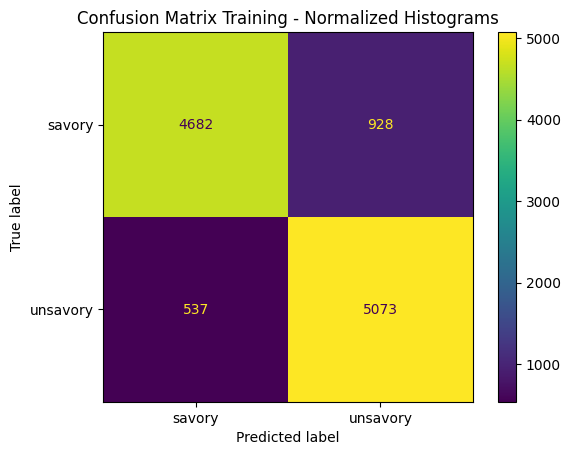

In [6]:
print(f"Normalized Histogram - Training Accuracy: {np.mean(bovw.model.predict(train_hist) == labels)}")
ConfusionMatrixDisplay.from_estimator(bovw.model, train_hist, labels)
plt.title("Confusion Matrix Training - Normalized Histograms")
plt.show()

## Load after training for test phase

In [7]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:09<00:00, 63.52it/s]


BOVW computed in: 0.3292155999999977
Normalized Histogram - Test Accuracy: 0.8366666666666667


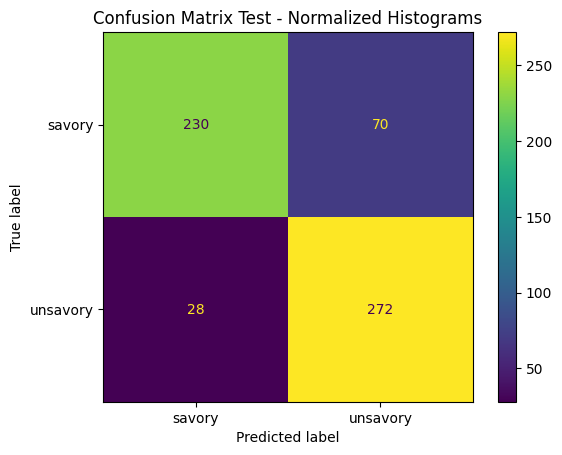

In [8]:
descr_test, labels_test, test_path = bovw.extract_Sifts(path_test, 'jpg')
histogram_test = bovw.compute_histogram(descr_test, labels_test)
predictions =  [i for i in bovw.model.predict(histogram_test)]

print(f"Normalized Histogram - Test Accuracy: {np.mean(bovw.model.predict(histogram_test) == labels_test)}")

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_test, labels_test)
plt.title("Confusion Matrix Test - Normalized Histograms")
plt.show()

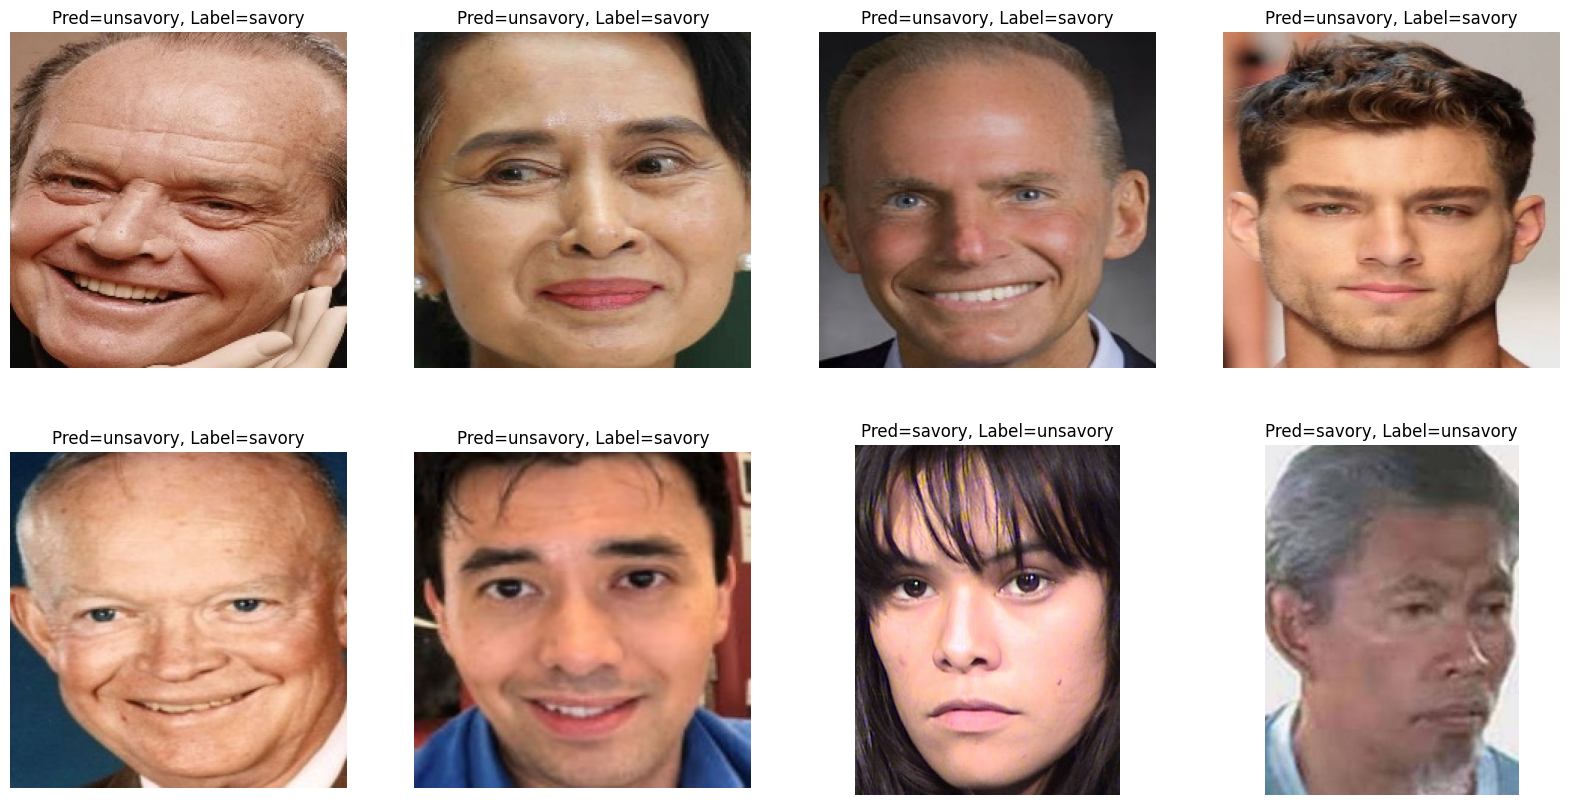

In [9]:
BOVW.show_results(bovw.model, histogram_test, labels_test, test_images_path, show_positive=False)

## CBIR from 0

In [10]:
for p in test_images_path:
    pred, k_similar = BOVW.cbir('./bovw/bovw.pkl', p, './bovw/train_bovw.pkl', './bovw/train_paths.pkl')
    print(pred)
    print(k_similar)
    break

BOVW computed in: 0.0008428000001003966
KDTree computed in: 0.10459370000012314
10 most similar found in: 0.001971000000139611
['unsavory']
['..\\..\\..\\dataset\\train\\unsavory\\1558.jpg', '..\\..\\..\\dataset\\train\\unsavory\\2221.jpg', '..\\..\\..\\dataset\\train\\unsavory\\2975.jpg', '..\\..\\..\\dataset\\train\\unsavory\\1499.jpg', '..\\..\\..\\dataset\\train\\savory\\2681.jpg', '..\\..\\..\\dataset\\train\\unsavory\\2032.jpg', '..\\..\\..\\dataset\\train\\unsavory\\1029.jpg', '..\\..\\..\\dataset\\train\\savory\\3915.jpg', '..\\..\\..\\dataset\\train\\savory\\3321.jpg', '..\\..\\..\\dataset\\train\\unsavory\\2144.jpg']
